In [10]:
import sys

import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as con

sys.path.append('/Users/jordanlee/Projects/SummerProject/ParticleSwarm')

import pso as pso

In [11]:
def Ackley(X):
    n = X.shape[1]  # Number of dimensions (should be 20 for this problem)
    
    # Calculate the objective function value for each row in X
    term1 = -20 * np.exp(-0.2 * np.sqrt(np.sum(X**2, axis=1) / n))
    term2 = -np.exp(np.sum(np.cos(2 * np.pi * X), axis=1) / n)
    y = term1 + term2 + 20 + np.e
    
    # Make function negative to find the minimum
    y = -y.reshape(-1, 1)
    
    return y

In [12]:
number_of_particles = 256
bounds = np.array([[-5, 10]] * 15)

species_1_hyperparameters = [0.6, 0.3, 0.5, 0]
species_2_hyperparameters = [0, 0, 0, 1]

iterations = 50

hyper_parameter_sets = np.array([species_1_hyperparameters, species_2_hyperparameters])

species_probabilities = np.array([1.0, 0.])

velocity_threshold = 1 / np.e**3
# velocity_threshold = 0
velocity_boost = 1 / np.e

In [13]:
optimiser = pso.PSO(bounds, number_of_particles, hyper_parameter_sets, species_probabilities, velocity_threshold, velocity_boost, maximise=True)
optimiser.InitialiseSwarm()

iterations = 65
for i in range(iterations):
    X = optimiser.GetNextX()
    Y = Ackley(X)
    optimiser.UpdateOptimiser(Y)

optimiser.swarm.global_max, optimiser.swarm.global_max_position

(-0.051849570205693585,
 array([-0.00929176, -0.00323787, -0.00636369,  0.01135182, -0.00118856,
        -0.00348119,  0.00062939, -0.00455175,  0.00346458, -0.02090585,
         0.00115715, -0.00842006, -0.02088321,  0.00521802, -0.02492473]))

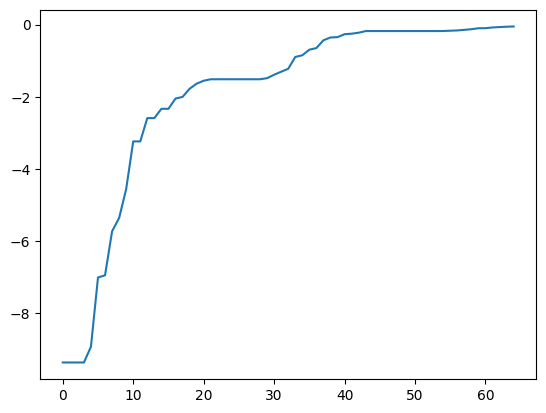

In [14]:
plt.plot(optimiser.swarm.global_max_history)

Text(0.5, 0, 'Iteration #')

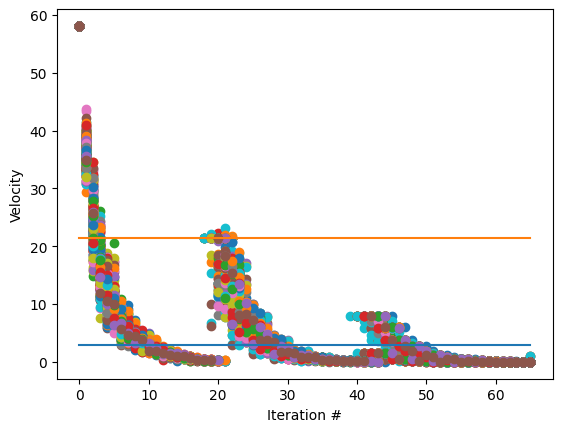

In [15]:
for particle in optimiser.swarm.particles:
    plt.scatter(range(optimiser.iteration + 1), np.linalg.norm(particle.velocity_history, axis=1))

plt.plot([0, iterations], [np.linalg.norm(particle.velocity_history, axis=1)[0]/ np.e**3, np.linalg.norm(particle.velocity_history, axis=1)[0]/ np.e**3])
plt.plot([0, iterations], [np.linalg.norm(particle.velocity_history, axis=1)[0]/ np.e, np.linalg.norm(particle.velocity_history, axis=1)[0]/ np.e])

plt.ylabel('Velocity')
plt.xlabel('Iteration #')

In [16]:
"""
For faster benchmarking:
"""

optimum = []
optimum_location = []

for i in range(100):
    optimiser = pso.PSO(bounds, number_of_particles, hyper_parameter_sets, species_probabilities, velocity_threshold, velocity_boost, maximise=True)
    optimiser.InitialiseSwarm()

    for i in range(iterations - 1):
        X = optimiser.GetNextX()
        Y = Ackley(X)
        optimiser.UpdateOptimiser(Y)

    optimum.append(optimiser.swarm.global_max)
    optimum_location.append(optimiser.swarm.global_max_position)
    
np.mean(optimum), np.mean(optimum_location, axis=0)

(-1.167745007862357,
 array([0.05122092, 0.0931247 , 0.10935454, 0.080865  , 0.10110094,
        0.08207149, 0.03109931, 0.04315982, 0.10915886, 0.11110918,
        0.07185897, 0.06575753, 0.10756065, 0.13066965, 0.03802319]))

In [17]:
-1.6254971793939552

-1.6254971793939552

In [18]:
-1.9876343138041097

-1.9876343138041097